In [102]:
import numpy as np
def otsu_thresholding(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    #leere Liste für alle within class variances erstellen
    variance_list = list()

    # optimalen threshhold herausfinden
    for T in range(1,len(counts)):
        
        #within class variance herausfinden
        
        #definieren von w0 und Hintergrund Mittelwert
        sum_back = 0 
        mean_sum_back = 0
        for i in range(0,T):
            sum_back += counts[i]
            mean_sum_back += counts[i] * bins[i]

        w0 = sum_back / sum(counts)
        mean_back = mean_sum_back / sum_back


        #definieren von w1 und Vordergrund Mittelwert
        sum_obj = 0
        mean_sum_obj = 0

        for j in range(T,len(counts)):
            sum_obj += counts[j]
            mean_sum_obj += counts[j] * bins[j]

        w1 = sum_obj / sum(counts)
        mean_obj = mean_sum_obj / sum_obj

        #Varianz Hintergrund
        var_sum_back = 0
        for k in range(0, T):
            var_sum_back += counts[k] * (bins[k] - mean_back)**2 

        var_back = var_sum_back / sum_back

        #Varianz Vordergrund
        var_sum_obj = 0
        for l in range(T, len(counts)):
            var_sum_obj += counts[l] * (bins[l] - mean_obj)**2 

        var_obj = var_sum_obj / sum_obj

        # Within Class Varianz berechnen
        within_class_varianz = w0 * var_back + w1 * var_obj
        
        #within class variance zu Liste hinzufügen
        variance_list.append(within_class_varianz)
    
    
    #minimalen Wert für T aussuchen 
    minvar = min(variance_list)
    for m in range(0,len(variance_list)):
        if variance_list[m] == minvar: 
            THRESH = round(bins[m])

    print(minvar)
    print(THRESH)
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

8.192910766387335
30


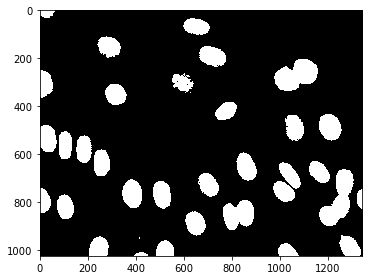

In [103]:
from skimage import io
img1 = io.imread('../BilderDaten/BilderDaten/NIH3T3/img/dna-0.png')
io.imshow(otsu_thresholding(img1))

In [106]:
#otsu vektorisiert
import numpy as np

def otsu_thresholding_vek(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    sum_back = np.cumsum(counts)[:-1]
    sum_obj = sum(counts)-sum_back
    mean_back = np.cumsum(bins[:-2]*counts[:-1])/sum_back
    mean_obj = (sum(bins[:-2]*counts[:-1])-np.cumsum(bins[:-2]*counts[:-1]))/sum_obj
    w0_list = sum_back/sum(counts)
    w1_list = 1 - w0_list

    #calculate background and foreground variance
    var_back_list = list()
    var_obj_list = list()
    for i in range (0,len(mean_back)):
        var_back = sum((counts[:i]*(bins[:i]-mean_back[i]))**2)/sum_back[i]
        var_back_list.append(var_back)
        var_obj = sum((counts[i:-1]*(bins[i:-2]-mean_obj[i]))**2)/sum_obj[i]
        var_obj_list.append(var_obj)
        
    
        
    wcv_list = (w0_list * var_back_list) + (w1_list * var_obj_list)
    minvar = min(wcv_list)
    print(minvar)
    for m in range(0,len(wcv_list)):
        if wcv_list[m] == minvar: 
            THRESH = round(bins[m])
    print(THRESH)
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

[ 3125942.08951788  3135502.3598892   3963870.04506062 11924021.32729745
 10386117.59779157   829139.24431068   224565.31445917   167694.31037626
   157141.96673297   157912.24859356   163057.78631088   172023.63524939
   186470.64096182   210747.31960907   251310.45486661   316112.92030986
   411024.34797961   542818.4645039    710157.04836788   904639.79629574
  1108772.97772307  1312706.64851136  1502892.37740358  1672952.9441981
  1823798.2479586   1958805.86153316  2081315.59032542  2193236.94609446
  2297978.88657915  2392947.62455081  2477121.65566142  2554930.88697349
  2622566.2084973   2683213.82179848  2733034.517664    2777143.27362226
  2815996.93771151  2851220.90843387  2881481.65720784  2908734.1797041
  2933154.15800435  2956705.97626621  2976397.4054689   2994326.00130471
  3009356.42727387  3022747.36888821  3036336.29701293  3047400.78310504
  3056637.45290626  3065416.04626541  3073830.37147573  3080845.9255494
  3086925.6632648   3093325.1732596   3097967.75903292

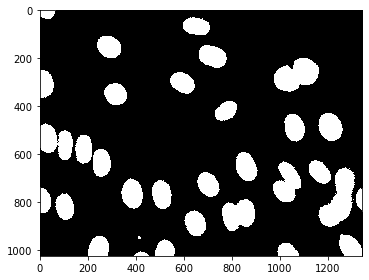

In [107]:
from skimage import io
img1 = io.imread('../BilderDaten/BilderDaten/NIH3T3/img/dna-0.png')
io.imshow(otsu_thresholding_vek(img1))